# Data Analysis

## Read CSVs

In [1]:
## Libraries
import pandas as pd

## Paths
## Fashion MNIST
# complete
fashion_complete_path_cyclic    = "./results/fashion-complete-c-d-bu-results.csv"
fashion_complete_path           = "./results/fashion-complete-bu-results.csv"
# sound
fashion_sound_path_cyclic       = "./results/fashion-c-bu-d-results.csv"
fashion_sound_path              = "./results/fashion-td-results.csv"

## MNIST
# complete
mnist_complete_path_cyclic      = "./results/mnist-complete-c-d-bu-results.csv"
mnist_complete_path             = "./results/mnist-complete-bu-results.csv"
# sound
mnist_sound_path_cyclic         = "./results/mnist-c-bu-d-results.csv"
mnist_sound_path                = "./results/mnist-td-results.csv"


## Column Names
column_labels = [
    "x_star path",
    "Num. of Its",
    "CPU Time",
    "Complexity",
    "Min. Edge Len.",
    "Verif. Total Time",
    "Verif. Num. Calls",
    "Timeout"
]



## Read CSVs
# Fashion MNIST
# complete
fashion_complete_df         = pd.read_csv(fashion_complete_path,        sep=" ",    names=column_labels)
fashion_complete_cyclic_df  = pd.read_csv(fashion_complete_path_cyclic, sep=" ",    names=column_labels)
# sound
fashion_sound_df            = pd.read_csv(fashion_sound_path,           sep=" ",    names=column_labels)
fashion_sound_cyclic_df     = pd.read_csv(fashion_sound_path_cyclic,    sep=" ",    names=column_labels)

# MNIST
# complete
mnist_complete_df           = pd.read_csv(mnist_complete_path,          sep=" ",    names=column_labels)
mnist_complete_cyclic_df    = pd.read_csv(mnist_complete_path_cyclic,   sep=" ",    names=column_labels)
# sound
mnist_sound_df              = pd.read_csv(mnist_sound_path,             sep=" ",    names=column_labels)
mnist_sound_cyclic_df       = pd.read_csv(mnist_sound_path_cyclic,      sep=" ",    names=column_labels)

## Preprocess Results

In [2]:
import typing as t

def paths2value_ids(paths):
    if not isinstance(paths[0], str): return paths

    instance_ids    = list(map(lambda path: path.split("/")[-1].split(".")[0], paths))
    value_ids       = []
    if "_" in instance_ids[0]:
        value_ids = list(map(lambda instance_id: int(instance_id.split("_")[0]) * 10 + int(instance_id.split("_")[1]), instance_ids))
    else:
        value_ids = list(map(lambda instance_id: int(instance_id.split("-")[0]) * 10 + int(instance_id.split("-")[1]), instance_ids))

    return value_ids


## Fashion MNIST
# complete
fashion_complete_df["x_star path"] = paths2value_ids(fashion_complete_df["x_star path"].to_list())
fashion_complete_df.sort_values("x_star path", ascending=True, inplace=True)

fashion_complete_cyclic_df["x_star path"] = paths2value_ids(fashion_complete_cyclic_df["x_star path"].to_list())
fashion_complete_cyclic_df.sort_values("x_star path", ascending=True, inplace=True)

# sound
fashion_sound_df["x_star path"] = paths2value_ids(fashion_sound_df["x_star path"].to_list())
fashion_sound_df.sort_values("x_star path", ascending=True, inplace=True)

fashion_sound_cyclic_df["x_star path"] = paths2value_ids(fashion_sound_cyclic_df["x_star path"].to_list())
fashion_sound_cyclic_df.sort_values("x_star path", ascending=True, inplace=True)

## MNIST
# complete
mnist_complete_df["x_star path"] = paths2value_ids(mnist_complete_df["x_star path"].to_list())
mnist_complete_df.sort_values("x_star path", ascending=True, inplace=True)

mnist_complete_cyclic_df["x_star path"] = paths2value_ids(mnist_complete_cyclic_df["x_star path"].to_list())
mnist_complete_cyclic_df.sort_values("x_star path", ascending=True, inplace=True)

# sound
mnist_sound_df["x_star path"] = paths2value_ids(mnist_sound_df["x_star path"].to_list())
mnist_sound_df.sort_values("x_star path", ascending=True, inplace=True)

mnist_sound_cyclic_df["x_star path"] = paths2value_ids(mnist_sound_cyclic_df["x_star path"].to_list())
mnist_sound_cyclic_df.sort_values("x_star path", ascending=True, inplace=True)


## Convert to NumPy

In [3]:
## Convert to NumPy
# Fashion MNIST
# complete
fashion_complete_lengths        = fashion_complete_df["Min. Edge Len."].to_numpy()
fashion_complete_cyclic_lengths = fashion_complete_cyclic_df["Min. Edge Len."].to_numpy()
# sound
fashion_sound_lengths           = fashion_sound_df["Min. Edge Len."].to_numpy()
fashion_sound_cyclic_lengths    = fashion_sound_cyclic_df["Min. Edge Len."].to_numpy()

# MNIST
# complete
mnist_complete_lengths          = mnist_complete_df["Min. Edge Len."].to_numpy()
mnist_complete_cyclic_lengths   = mnist_complete_cyclic_df["Min. Edge Len."].to_numpy()
# sound
mnist_sound_lengths             = mnist_sound_df["Min. Edge Len."].to_numpy()
mnist_sound_cyclic_lengths      = mnist_sound_cyclic_df["Min. Edge Len."].to_numpy()

## Figures

In [4]:
import matplotlib.pyplot as plt

### MNIST

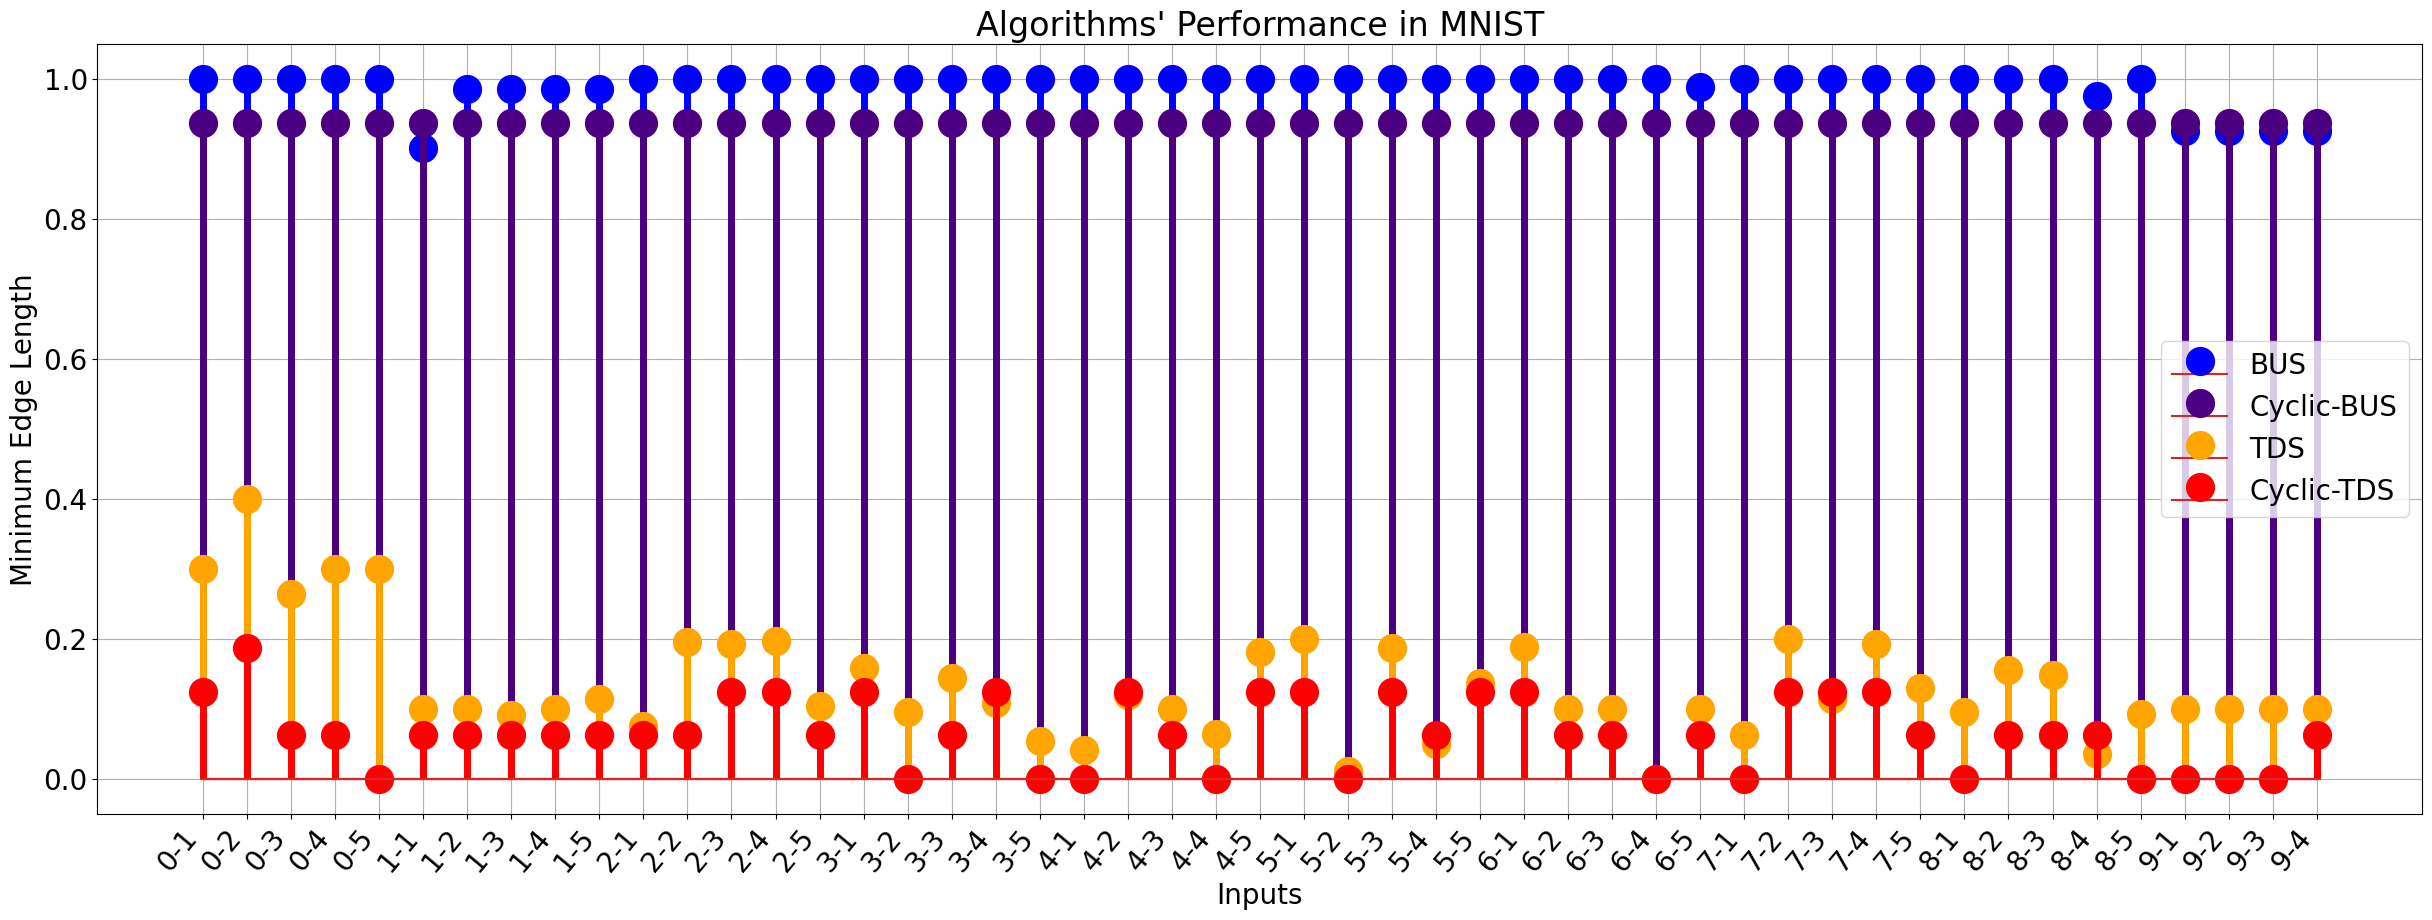

In [53]:
x_labels = [str(i) + "-" + str(j) for i in range(0, 10) for j in range(1, 6)][0:-1]

plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(1, figsize = (30, 10))
plt.setp(ax.get_xticklabels(), rotation=50, horizontalalignment='right')
ax.grid()

s = plt.stem(x_labels, mnist_complete_lengths, "blue", label="BUS")
s[0].set_markersize(20)
s[1].set_linewidth(5)
s = plt.stem(x_labels, mnist_complete_cyclic_lengths, "indigo", label="Cyclic-BUS")
s[0].set_markersize(20)
s[1].set_linewidth(5)
s = plt.stem(x_labels, mnist_sound_lengths, "orange", label="TDS")
s[0].set_markersize(20)
s[1].set_linewidth(5)
s = plt.stem(x_labels, mnist_sound_cyclic_lengths, "red", label="Cyclic-TDS")
s[0].set_markersize(20)
s[1].set_linewidth(5)

plt.title("Algorithms' Performance in MNIST")
plt.xlabel("Inputs")
plt.ylabel("Minimum Edge Length")

plt.legend()
plt.show()

### Fashion MNIST

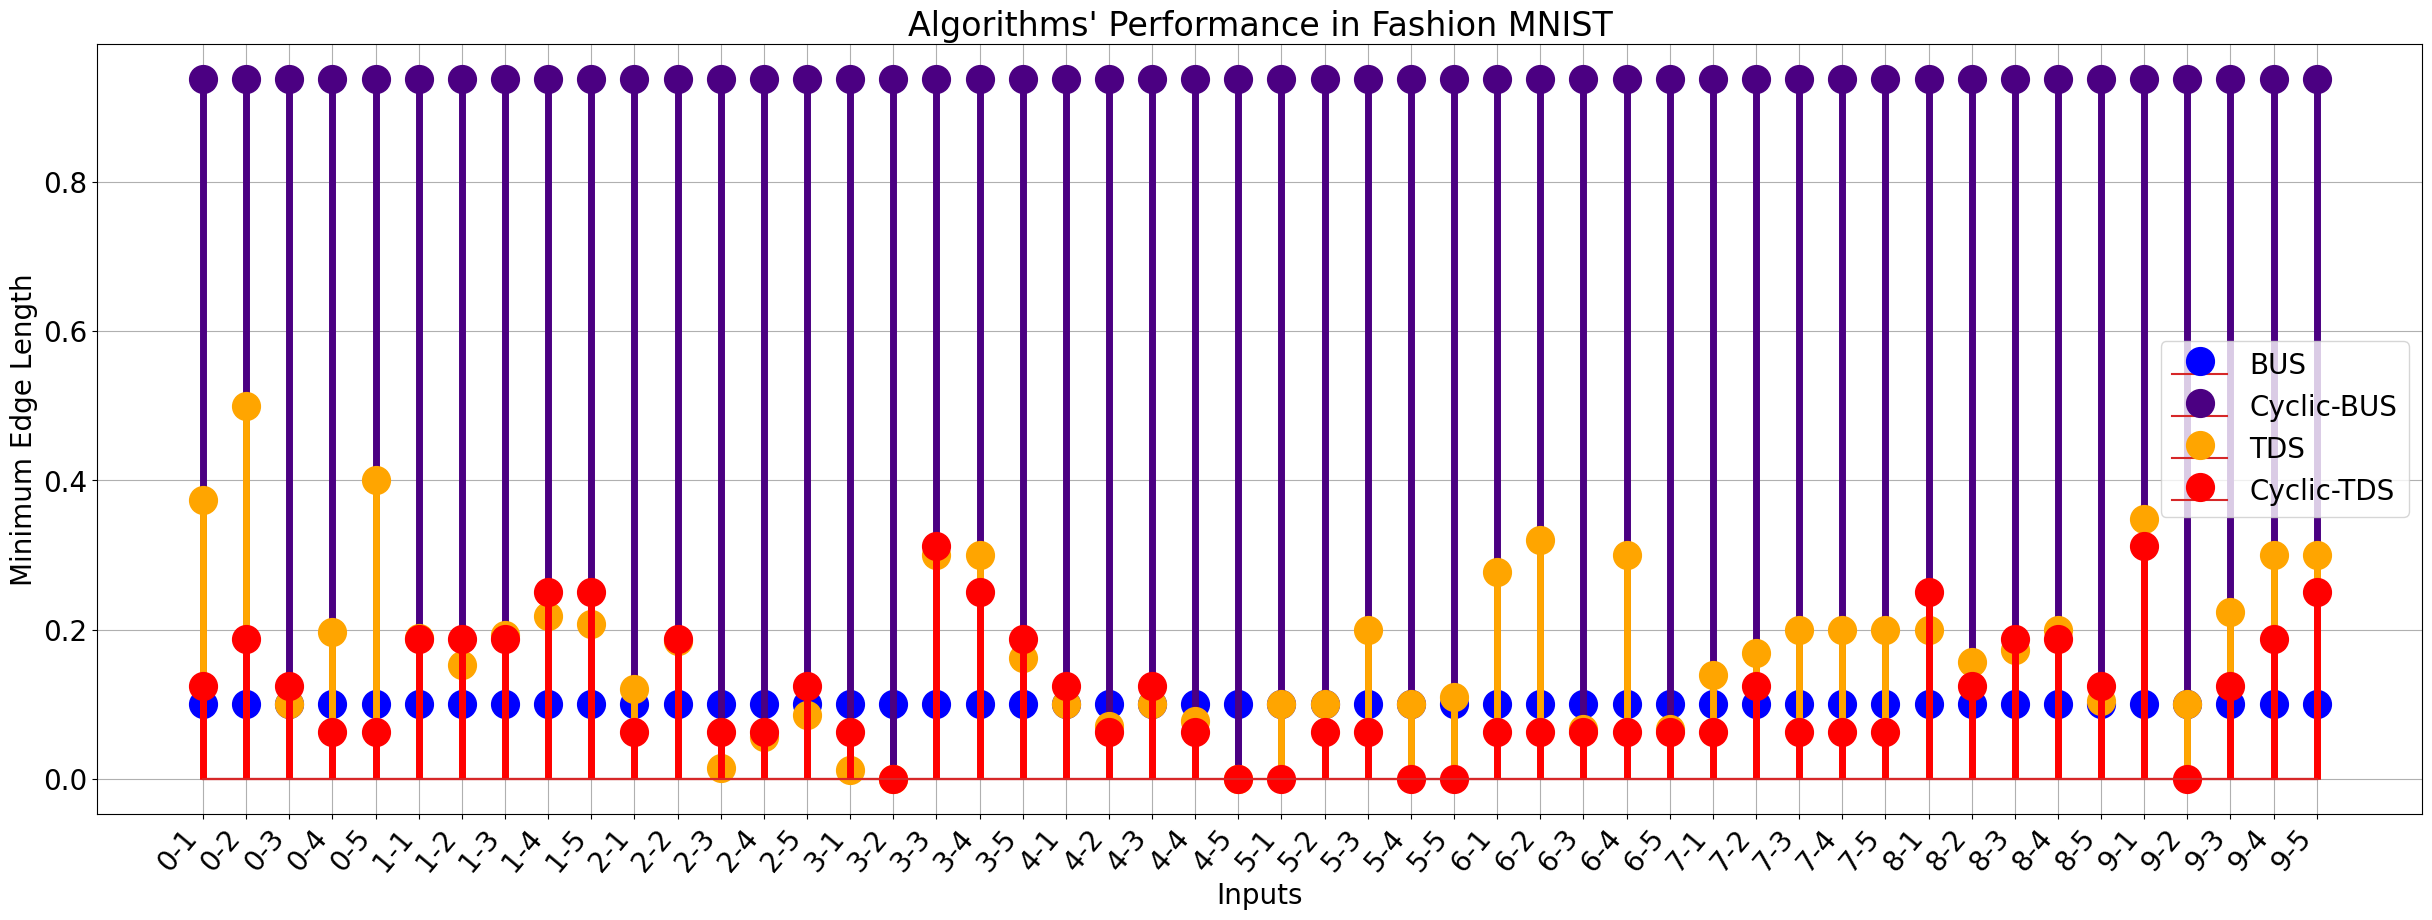

In [55]:
x_labels = [str(i) + "-" + str(j) for i in range(0, 10) for j in range(1, 6)]

plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(1, figsize = (30, 10))
plt.setp(ax.get_xticklabels(), rotation=50, horizontalalignment='right')
ax.grid()

s = plt.stem(x_labels, fashion_complete_lengths, "blue", label="BUS")
s[0].set_markersize(20)
s[1].set_linewidth(5)
s = plt.stem(x_labels, fashion_complete_cyclic_lengths, "indigo", label="Cyclic-BUS")
s[0].set_markersize(20)
s[1].set_linewidth(5)
s = plt.stem(x_labels, fashion_sound_lengths, "orange", label="TDS")
s[0].set_markersize(20)
s[1].set_linewidth(5)
s = plt.stem(x_labels, fashion_sound_cyclic_lengths, "red", label="Cyclic-TDS")
s[0].set_markersize(20)
s[1].set_linewidth(5)

plt.title("Algorithms' Performance in Fashion MNIST")
plt.xlabel("Inputs")
plt.ylabel("Minimum Edge Length")

plt.legend()
plt.show()